## 0. Review

In this **EDA** the following is checked for train and test datasets:
- **Volume of data**: is it enough for making a good predition?
- **Data cleaning**: which is the numbers or zeros or null values in both datasets?
- **Outliers**: do we have outliers in train/test/both?
- **Main features distribution**: is it similar in both train/test?
- **Features correlation with price**: which features have the strongest correlation (only for train)?
- **Data visualization**: so we get familiar with train dataset

## 1. Libraries import

In [151]:
# Ignore warnings ignore
import warnings
warnings.filterwarnings('ignore')

In [152]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data import

### 2.1 Train data

In [153]:
# Impor train data
df_diamonds_train=pd.read_csv('../data/diamonds_train.csv')
df_diamonds_train.drop(['Unnamed: 0', 'index_id'], axis=1,inplace=True) #dropped unnecessary columns
df_diamonds_train.head()

,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,Dubai
1,63.0,57.0,4.35,4.38,2.75,505,0.32,Very Good,H,VS2,Kimberly
2,65.5,55.0,5.62,5.53,3.65,2686,0.71,Fair,G,VS1,Las Vegas
3,63.8,56.0,4.68,4.72,3.00,738,0.41,Good,D,SI1,Kimberly
4,60.5,59.0,6.55,6.51,3.95,4882,1.02,Ideal,G,SI1,Dubai


### 2.2 Test data

In [154]:
# Impor test data
df_diamonds_test=pd.read_csv('../data/diamonds_test.csv')
df_diamonds_test.drop(['id'], axis=1,inplace=True) #dropped unnecessary columns
df_diamonds_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,city
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam


In [155]:
num_features_list=['x','y','z','depth','table','carat']
cat_features_list=['cut','color','clarity','city']

## 3. Volume and data types

1. Data volume it's ok for making a good predition:

In [156]:
# Train
df_diamonds_train.shape

(40455, 11)

In [157]:
# Test
df_diamonds_test.shape

(13485, 10)

There are 40455 instances in the dataset. That look enough.

2. Data types are the same:

In [158]:
# Train
df_diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   depth    40455 non-null  float64
 1   table    40455 non-null  float64
 2   x        40455 non-null  float64
 3   y        40455 non-null  float64
 4   z        40455 non-null  float64
 5   price    40455 non-null  int64  
 6   carat    40455 non-null  float64
 7   cut      40455 non-null  object 
 8   color    40455 non-null  object 
 9   clarity  40455 non-null  object 
 10  city     40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [159]:
# Test
df_diamonds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
 7   y        13485 non-null  float64
 8   z        13485 non-null  float64
 9   city     13485 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.0+ MB


3. Price is int64, let's change it to float64 (so all numeric values have the same type):

In [160]:
# Price is int64, let's change it to float64
df_diamonds_train["price"] = df_diamonds_train["price"].astype(float)

## 4. Check data quality (zeros/nulls)

1. Let's check now nulls values

In [161]:
# Train
df_diamonds_train.isna().sum()

depth      0
table      0
x          0
y          0
z          0
price      0
carat      0
cut        0
color      0
clarity    0
city       0
dtype: int64

In [162]:
# Test
df_diamonds_test.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
city       0
dtype: int64

There are not null values.

2. There are 0 values in both datasets but not a lot:

In [ ]:
# Train

In [163]:
df_diamonds_train['x'][(df_diamonds_train['x']==0)].count()

5

In [164]:
df_diamonds_train['y'][(df_diamonds_train['y']==0)].count()

4

In [165]:
df_diamonds_train['z'][(df_diamonds_train['z']==0)].count()

16

In [ ]:
# Test

In [166]:
df_diamonds_test['x'][(df_diamonds_test['x']==0)].count()

3

In [167]:
df_diamonds_test['y'][(df_diamonds_test['y']==0)].count()

3

In [168]:
df_diamonds_test['z'][(df_diamonds_test['z']==0)].count()

4

## 5. Outliers

Outliers are also present in both datasets:

In [169]:
def remove_outliers(df,feature):
    # IQR
    Q1 = np.percentile(df[feature], 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(df[feature], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    # Upper and lower
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    # Removing the Outliers
    return df[(df[feature]>=lower_limit) & (df[feature]<=upper_limit)]

In [ ]:
# Train

In [170]:
df_diamonds_train_no_outliers=remove_outliers(df_diamonds_train,'x')
df_diamonds_train_no_outliers=remove_outliers(df_diamonds_train_no_outliers,'y')
df_diamonds_train_no_outliers=remove_outliers(df_diamonds_train_no_outliers,'z')
df_diamonds_train_no_outliers=remove_outliers(df_diamonds_train_no_outliers,'depth')
df_diamonds_train_no_outliers=remove_outliers(df_diamonds_train_no_outliers,'table')
df_diamonds_train_no_outliers=remove_outliers(df_diamonds_train_no_outliers,'carat')
df_diamonds_train_no_outliers.shape

(37264, 11)

In [ ]:
# Test

In [171]:
df_diamonds_test_no_outliers=remove_outliers(df_diamonds_test,'x')
df_diamonds_test_no_outliers=remove_outliers(df_diamonds_test_no_outliers,'y')
df_diamonds_test_no_outliers=remove_outliers(df_diamonds_test_no_outliers,'z')
df_diamonds_test_no_outliers=remove_outliers(df_diamonds_test_no_outliers,'depth')
df_diamonds_test_no_outliers=remove_outliers(df_diamonds_test_no_outliers,'table')
df_diamonds_test_no_outliers=remove_outliers(df_diamonds_test_no_outliers,'carat')
df_diamonds_test_no_outliers.shape

(12333, 10)

Outliers are aprox a 8% of train and a 1% of test.

## 6. Features distribution

1. Let's compare distribution for categorical features:

**CUT**

In [172]:
# Train
df_diamonds_train["cut"].value_counts()/df_diamonds_train.shape[0]*100

Ideal        40.093932
Premium      25.361513
Very Good    22.481770
Good          9.054505
Fair          3.008281
Name: cut, dtype: float64

In [173]:
# Test
df_diamonds_test["cut"].value_counts()/df_diamonds_test.shape[0]*100

Ideal        39.532814
Premium      26.184650
Very Good    22.150538
Good          9.217649
Fair          2.914349
Name: cut, dtype: float64

**COLOR**

In [174]:
# Train
df_diamonds_train["color"].value_counts()/df_diamonds_train.shape[0]*100

G    20.899765
E    18.106538
F    17.740700
H    15.516005
D    12.480534
I     9.966630
J     5.289828
Name: color, dtype: float64

In [175]:
# Test
df_diamonds_test["color"].value_counts()/df_diamonds_test.shape[0]*100

G    21.038191
E    18.331479
F    17.538005
H    15.031516
D    12.799407
I    10.307749
J     4.953652
Name: color, dtype: float64

**CLARITY**

In [176]:
# Train
df_diamonds_train["clarity"].value_counts()/df_diamonds_train.shape[0]*100

SI1     24.098381
VS2     22.859968
SI2     17.127673
VS1     14.994438
VVS2     9.390681
VVS1     6.857002
IF       3.280188
I1       1.391670
Name: clarity, dtype: float64

In [177]:
# Test
df_diamonds_test["clarity"].value_counts()/df_diamonds_test.shape[0]*100

SI1     24.590286
VS2     22.321098
SI2     16.796440
VS1     15.609937
VVS2     9.395625
VVS1     6.533185
IF       3.433445
I1       1.319985
Name: clarity, dtype: float64

**CITY**

In [178]:
# Train
df_diamonds_train["city"].value_counts()/df_diamonds_train.shape[0]*100

Surat            12.539859
Antwerp          12.475590
Kimberly         12.300087
Luxembourg        6.441725
Las Vegas         6.392288
New York City     6.392288
Dubai             6.330491
Madrid            6.278581
Paris             6.253862
Tel Aviv          6.192065
Zurich            6.172290
Amsterdam         6.142628
London            6.088246
Name: city, dtype: float64

In [179]:
# Test
df_diamonds_test["city"].value_counts()/df_diamonds_test.shape[0]*100

Antwerp          12.554690
Surat            12.339637
Kimberly         12.072673
Zurich            6.703745
Paris             6.444197
Luxembourg        6.377456
London            6.332963
Amsterdam         6.229143
Dubai             6.221728
New York City     6.221728
Madrid            6.206897
Las Vegas         6.154987
Tel Aviv          6.140156
Name: city, dtype: float64

Categorical distribution is quite similar (it will ensure a good predition)

2. Let's compare statistics of both datasets

In [180]:
# Train
df_diamonds_train.describe()

,depth,table,x,y,z,price,carat
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,61.752841,57.446133,5.729392,5.732819,3.537154,3928.444469,0.797706
std,1.431725,2.233535,1.124453,1.146650,0.697062,3992.416147,0.475544
min,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000,0.200000
25%,61.000000,56.000000,4.710000,4.720000,2.910000,945.000000,0.400000
50%,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000,0.700000
75%,62.500000,59.000000,6.540000,6.540000,4.035000,5331.000000,1.040000
max,79.000000,95.000000,10.230000,58.900000,8.060000,18823.000000,4.500000


In [181]:
# Test
df_diamonds_test.describe()

,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,0.798642,61.739095,57.490337,5.736454,5.739648,3.543474
std,0.469399,1.435310,2.237109,1.113671,1.128507,0.731005
min,0.200000,50.800000,51.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.730000,4.730000,2.920000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000
75%,1.040000,62.500000,59.000000,6.530000,6.530000,4.040000
max,5.010000,79.000000,73.000000,10.740000,31.800000,31.800000


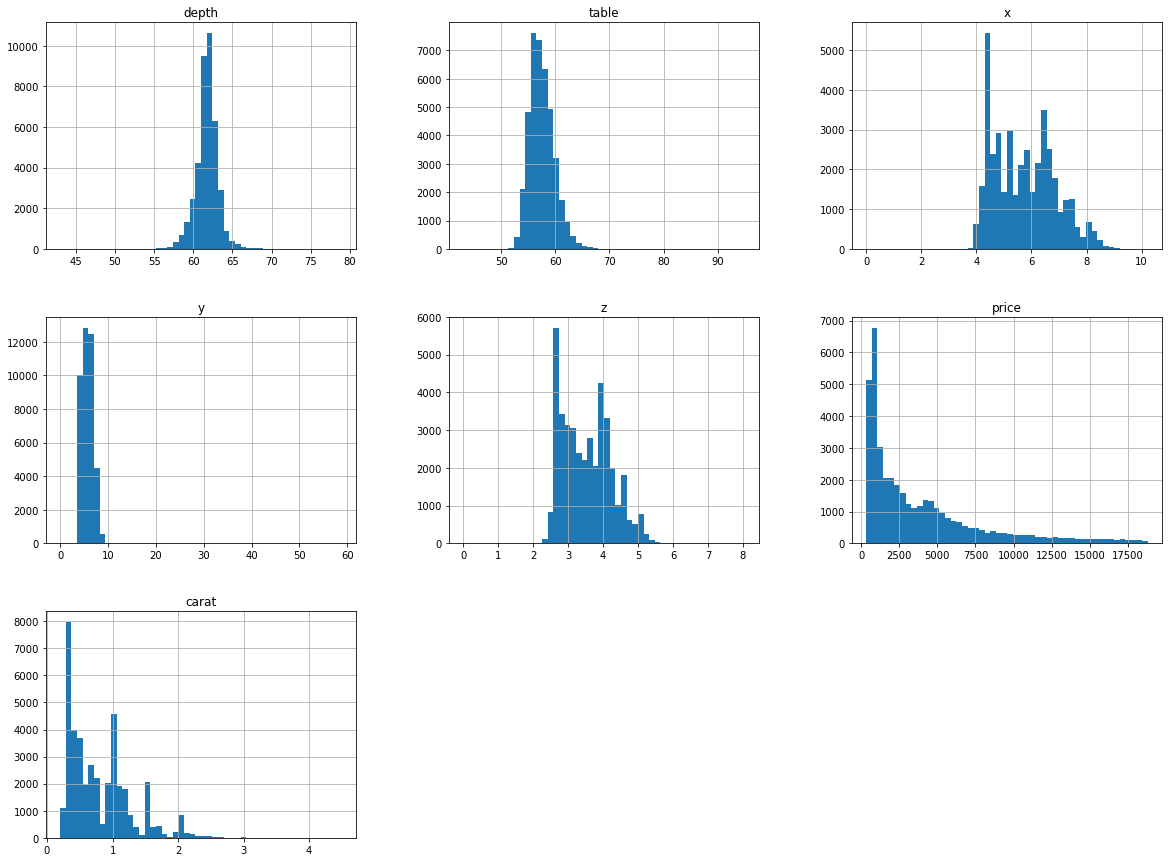

In [182]:
# Train
df_diamonds_train.hist(bins = 50, figsize = (20, 15))
plt.show()

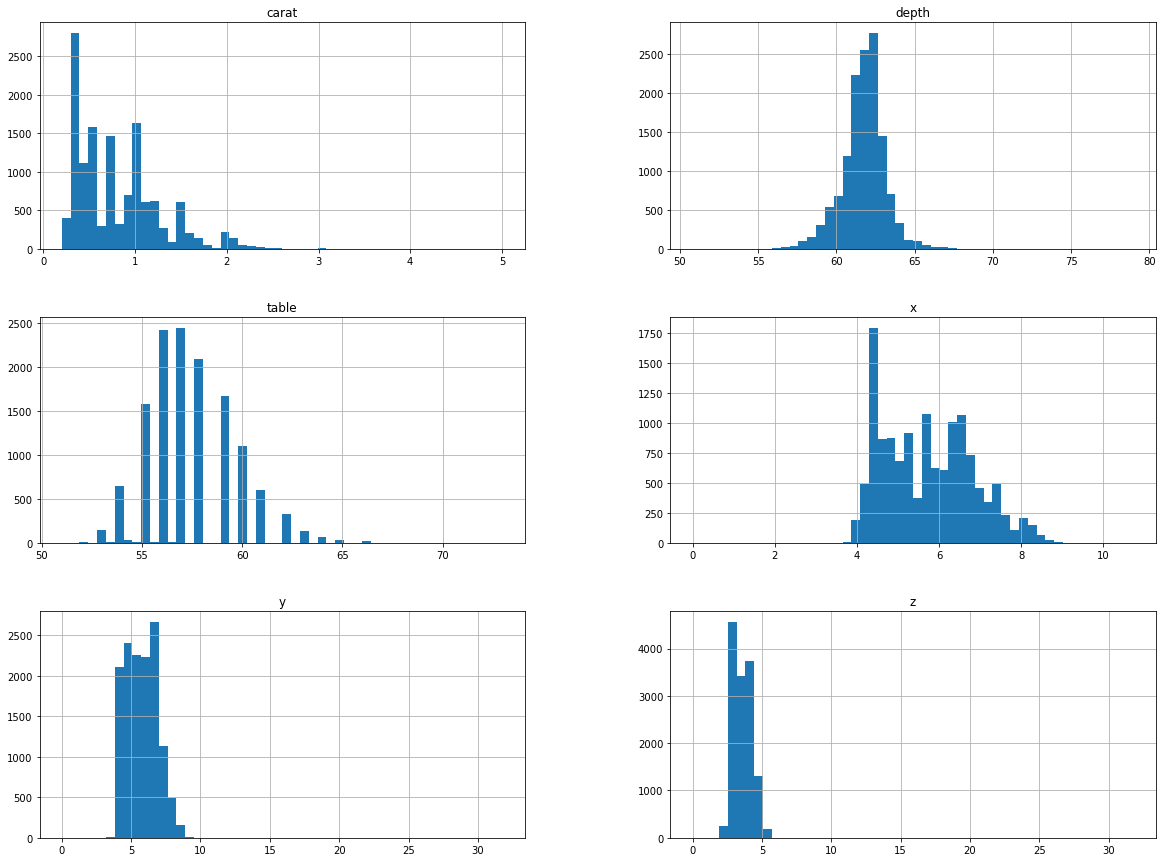

In [183]:
# Test
df_diamonds_test.hist(bins = 50, figsize = (20, 15))
plt.show()

Statistics is also very similar (it will ensure a good predition)

## 7. Features correlation with price

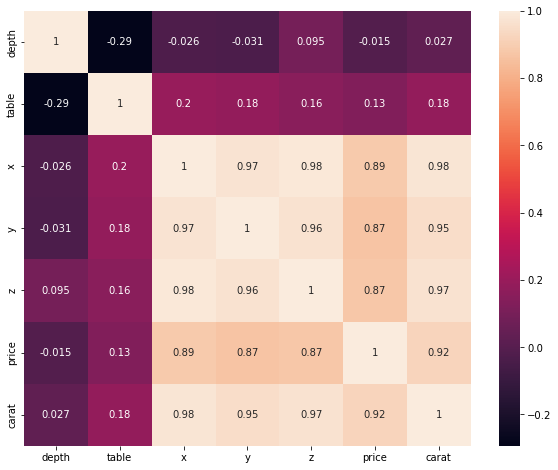

In [184]:
# Create a correlation matrix
corr_matrix = df_diamonds_train.corr()

# Plot the correlation using seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

From the plot above, we could deduce that:

- x, y, z have strong correlations with price
- carat has the strongest correlation with price (0.92)
- table and depth have the weakest correlations

## 8. Data Visualization

1. Price vs carat and cut

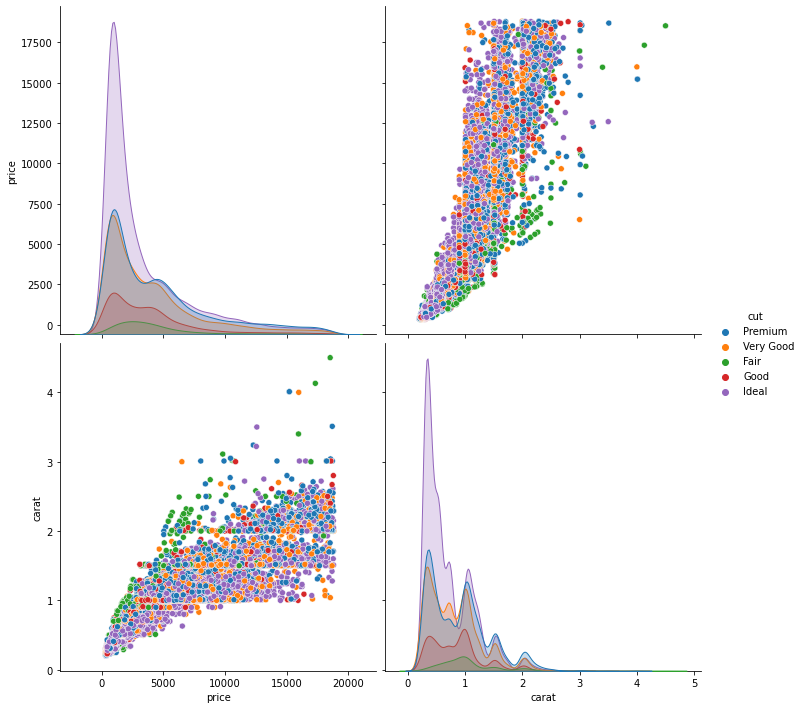

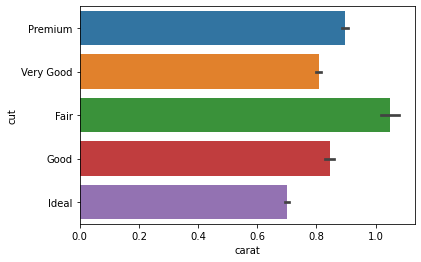

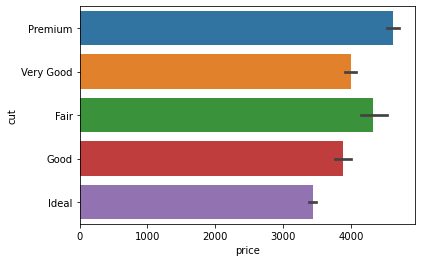

In [185]:
sns.pairplot(df_diamonds_train[["price", "carat", "cut"]], hue = "cut", height = 5)
plt.show()
sns.barplot(x = "carat", y = "cut", data = df_diamonds_train)
plt.show()
sns.barplot(x = "price", y = "cut", data = df_diamonds_train)
plt.show()

Fair cuts are most weighed, but they aren't the most expensive diamonds. Premium cuts weigh less than the fair and then cost more. Ideal cuts weigh way less and they are least expensive. The cut therefore is relatively considered while determining the price of the diamond.

2. Price vs carat and color

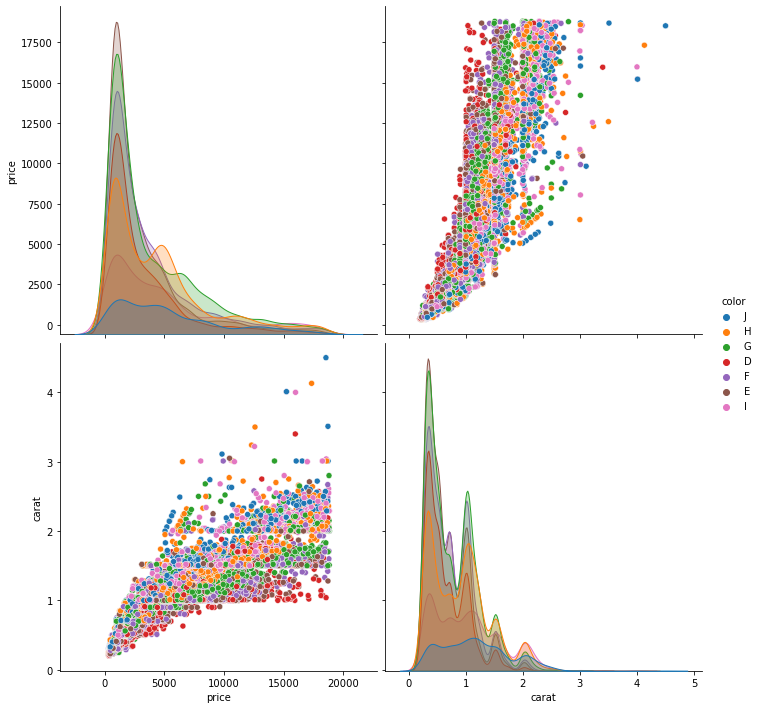

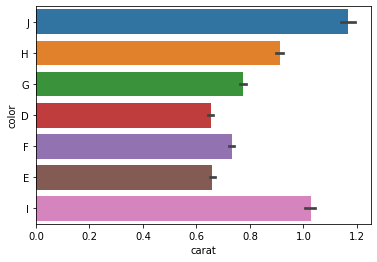

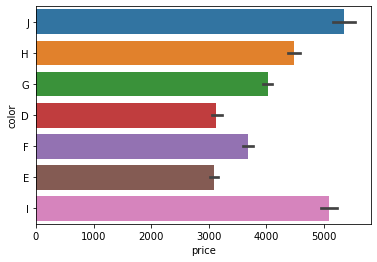

In [187]:
sns.pairplot(df_diamonds_train[["price", "carat", "color"]], hue = "color", height = 5)
plt.show()
sns.barplot(x = "carat", y = "color", data = df_diamonds_train)
plt.show()
sns.barplot(x = "price", y = "color", data = df_diamonds_train)
plt.show()

Color J which is the most weighed is also the most priced. The last 2 plots are very similar. We could see here that the color of the diamond is also very dependent on its price.

3. Price vs carat and clarity

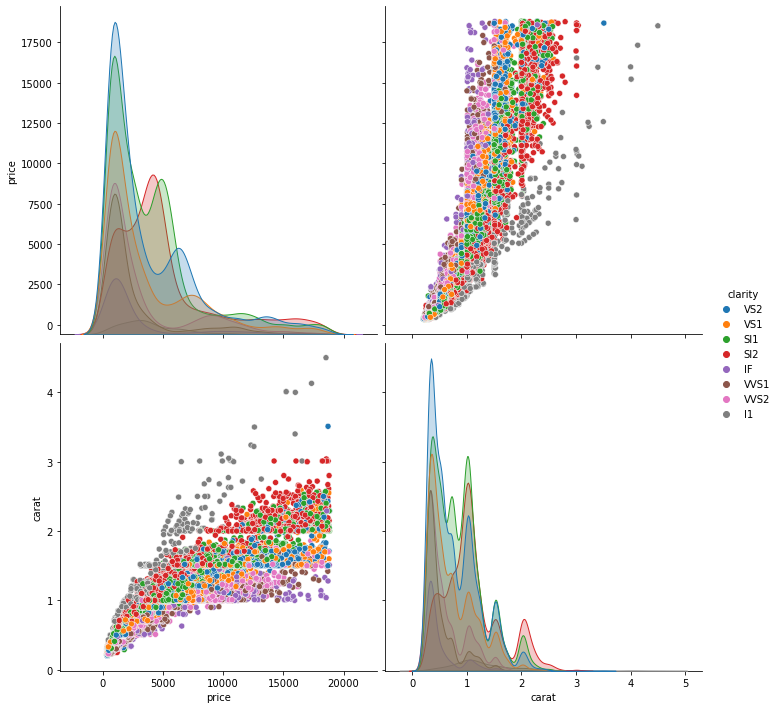

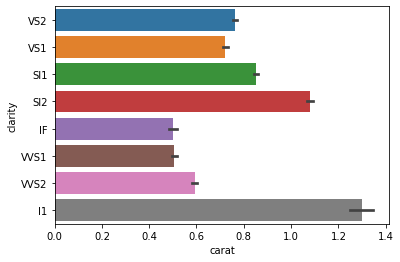

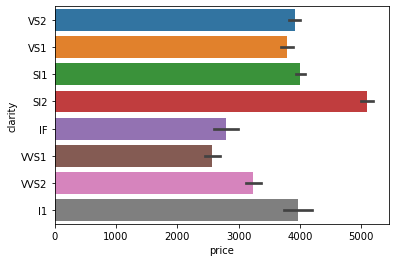

In [30]:
sns.pairplot(df_diamonds_train[["price", "carat", "clarity"]], hue = "clarity", height = 5)
plt.show()
sns.barplot(x = "carat", y = "clarity", data = df_diamonds_train)
plt.show()
sns.barplot(x = "price", y = "clarity", data = df_diamonds_train)
plt.show()

I1 doesn't hold the highest clarity, even though it is the most priced. But there's something else: Apart from I1, if the rest stays, the price of a diamond could fairly be relative to its clarity, to some extent.

4. Price vs carat and city

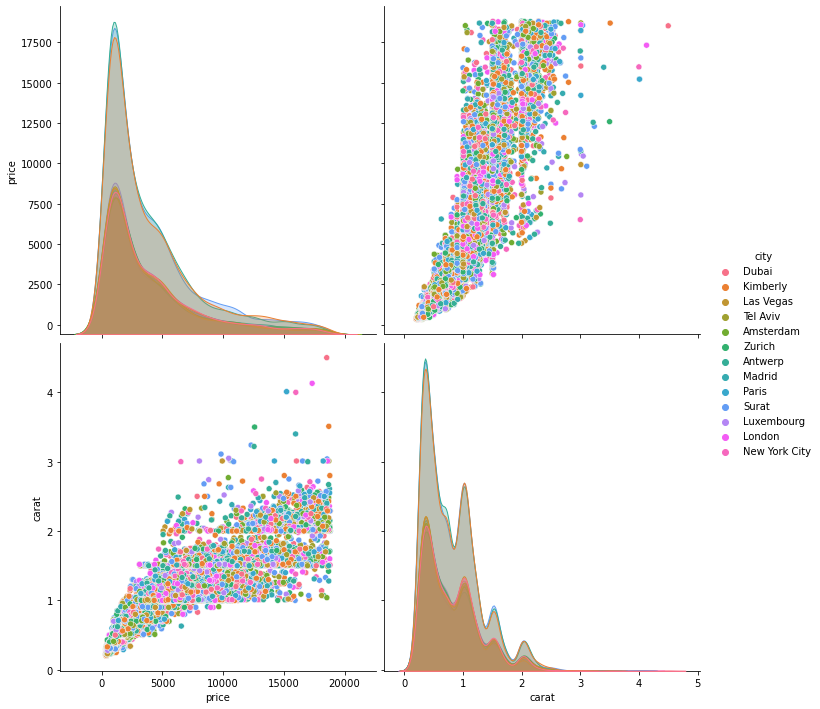

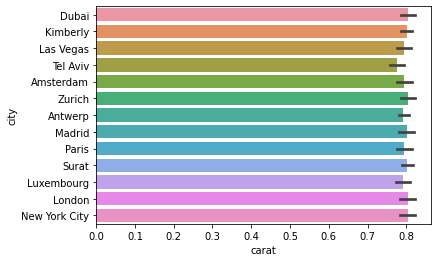

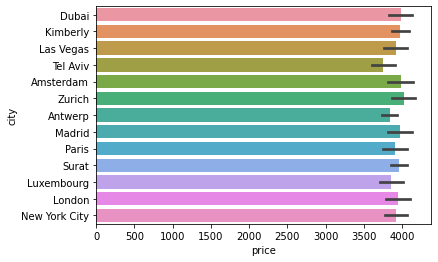

In [190]:
sns.pairplot(df_diamonds_train[["price", "carat", "city"]], hue = "city", height = 5)
plt.show()
sns.barplot(x = "carat", y = "city", data = df_diamonds_train)
plt.show()
sns.barplot(x = "price", y = "city", data = df_diamonds_train)
plt.show()

Diamonds price and carat are very similar in the different cities